In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
sns.set_theme(style = 'darkgrid')

In [ ]:
data = pd.read_excel("../data/raw/wind_speed_2024.xlsx", index_col=0)
data.head()

In [ ]:
columns = data.drop(columns='Data').columns.to_list()
columns

In [ ]:
def pre_process_data(data: pd.DataFrame, columns: list):
    """
    Setting dataframe according to Statsforecast
	"""

    data = pd.melt(data, id_vars=['Data'],
                   var_name='unique_id',
                   value_vars=columns,
                   value_name='y')
    return data

In [ ]:
data_preprocessed = pre_process_data(data, columns)
data_preprocessed.head()

In [ ]:
test = data_preprocessed.query("unique_id == 'Alagoas'").rename(columns={'Data':'ds'})

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

In [ ]:
train = test.drop(test.tail(60).index)
test2 = test.tail(60)

In [ ]:
test2

In [ ]:
models = [
    AutoARIMA(alias='stepwise', season_length=12)
]

In [ ]:
sf = StatsForecast(models = models, freq = 'MS', n_jobs= -1)

In [ ]:
sf.fit(train)

In [ ]:
from statsforecast.arima import ARIMASummary

In [ ]:
summaries =[]
for model in sf.fitted_[0]:
    summary_model = {
        "model": model,
        "Orders": ARIMASummary(model.model_),
        "sigma2": model.model_["sigma2"],
        "loglik": model.model_["loglik"],
        "aic": model.model_["aic"],
        "aicc": model.model_["aicc"],
        "bic": model.model_["bic"],
    }
    summaries.append(summary_model)

pd.DataFrame(sorted(summaries, key=lambda d: d["aicc"]))

In [ ]:
forecasted = sf.forecast(df= train,h=60, level=[95])

forecasted

In [ ]:
fitted_values

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(forecasted,
             x = 'ds', y = 'stepwise', label= 'forecasted')
sns.lineplot(test2, x = 'ds', y='y', label ='obs')
plt.fill_between(
    x=forecasted['ds'], 
    y1=forecasted['stepwise-lo-95'], 
    y2=forecasted['stepwise-hi-95'],  
    color="#2e478b", # mesma cor da linha de previsão
    alpha=0.2 # transparência
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast

In [ ]:
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
sf2 = MLForecast(models=[model2],
                 freq = 'MS',
                 lags= list(range(1,13)))

In [ ]:
sf2.fit(train)

In [173]:
forecasted2 = sf2.predict(h=60)

forecasted2

,unique_id,ds,RandomForestRegressor
0,Alagoas,2020-01-01,7.277283
1,Alagoas,2020-02-01,6.690079
2,Alagoas,2020-03-01,6.614815
3,Alagoas,2020-04-01,6.554383
4,Alagoas,2020-05-01,7.010902
5,Alagoas,2020-06-01,7.515189
6,Alagoas,2020-07-01,7.687885
7,Alagoas,2020-08-01,7.692176
8,Alagoas,2020-09-01,7.726073
9,Alagoas,2020-10-01,7.733904


<Axes: xlabel='ds', ylabel='RandomForestRegressor'>

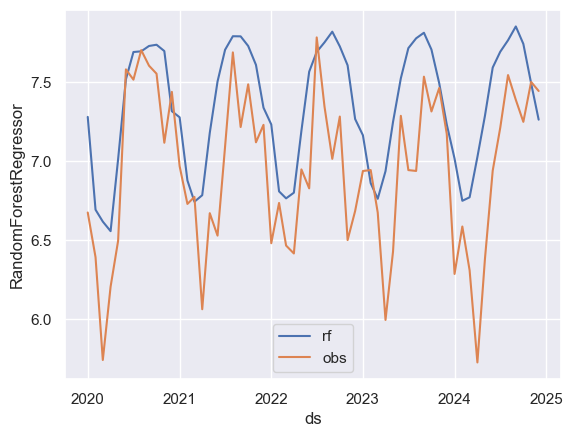

In [175]:
sns.lineplot(forecasted2, x = 'ds', y ='RandomForestRegressor', label = 'rf')
sns.lineplot(test2, x = 'ds', y='y', label ='obs')

In [180]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test2['y'], forecasted2['RandomForestRegressor'])
print("MSE:", mse)

MSE: 0.2767957946326477


In [179]:
mean_squared_error(test2['y'], forecasted['stepwise'])

0.2722734575121684

In [181]:
cv_df = sf2.cross_validation(
    df=train,
    h=60,
    n_windows=3,
)

In [184]:
cv_df.head()

,unique_id,ds,cutoff,y,RandomForestRegressor
0,Alagoas,2005-01-01,2004-12-01,7.114158,7.036649
1,Alagoas,2005-02-01,2004-12-01,6.989000,7.013171
2,Alagoas,2005-03-01,2004-12-01,6.503456,6.818868
3,Alagoas,2005-04-01,2004-12-01,6.889752,6.860004
4,Alagoas,2005-05-01,2004-12-01,7.545853,7.263439


In [197]:
def plot_cv(df, df_cv, uid, last_n=60 * 14):
    cutoffs = df_cv.query('unique_id == @uid')['cutoff'].unique()
    fig, ax = plt.subplots(nrows=len(cutoffs), ncols=1, figsize=(12, 15), gridspec_kw=dict(hspace=0.8))
    for cutoff, axi in zip(cutoffs, ax.flat):
        df.query('unique_id == @uid').tail(last_n).set_index('ds').plot(ax=axi, title=uid, y='y')
        df_cv.query('unique_id == @uid & cutoff == @cutoff').set_index('ds').plot(ax=axi, title=uid, y='RandomForestRegressor')
    # plt.close()

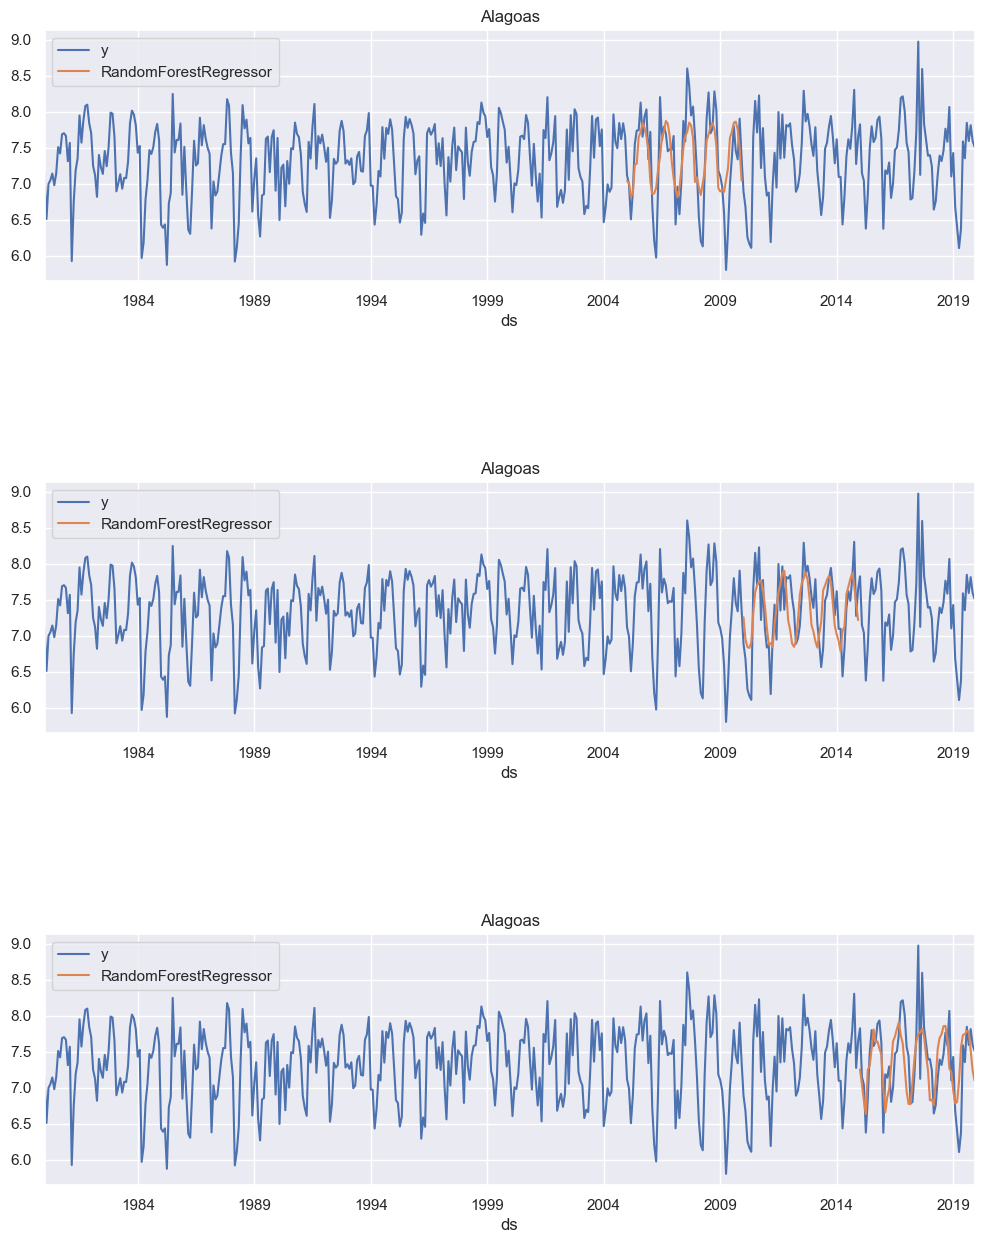

In [198]:
plot_cv(train, cv_df, "Alagoas", last_n=len(train))